<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oily Giant

Perusahaan minyak Oily Giant kali ini sedang mencoba untuk membuka kilang minyak terbaru mereka, disediakan data tentang masing masing sumur yang telah di riset yaitu tentang tiga fitur titik dan juga volume cadangan minyak yang tersedia di sumur tersebut. Terdapat 3 Wilayah yang telah diriset untuk dijadikan tujuan pembuatan kilang minyak.

Tugas kali ini ditujukan untuk mencari wilayah mana dan sumur mana yang kira kira bisa mendapatkan keuntungan yang besar setelah diperhitungkan dengan biaya produksinya. Pencarian wilayah tersebut akan dibantu menggunakan machine learning dengan fitur tiga titik yang disediakan. Metode yang akan digunakan adalah Regresi Linear

Kondisi yang digunakan adalah sebagai berikut:
1. Anggaran mengembangkan 200 sumur minyak adalah 100 juta USD
2. Satu barel bahan mentah menghasilkan 4,5 USD pendapatan. Pendapatan dari satu unit produk adalah 4.500 dolar (volume cadangan minyak dalam ribuan barel).
3. Setelah mengevaluasi risiko, hanya wilayah dengan risiko kerugian lebih rendah dari 2,5% yang akan dipertahankan.

Prosedur yang akan dilakukan yaitu:
1. Data Checking dan Splitting untuk pelatihan model Machine Learning
2. Training Model dan Sanity Check
3. Perhitungan RMSE untuk masing masing model
4. Lakukan bootstrapping untuk 1000 sample untuk melihat distribusi laba
5. Perhitungan Laba untuk 200 titik terbaik
6. Pilih titik dengan probabilitas kerugian kurang dari 2,5%
7. Pilih wilayah dengan laba tertinggi

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation-&amp;-Library-Importation" data-toc-modified-id="Data-Preparation-&amp;-Library-Importation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation &amp; Library Importation</a></span><ul class="toc-item"><li><span><a href="#Data-Checking" data-toc-modified-id="Data-Checking-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Checking</a></span></li><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Splitting</a></span></li></ul></li><li><span><a href="#Pembuatan-Model" data-toc-modified-id="Pembuatan-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pembuatan Model</a></span><ul class="toc-item"><li><span><a href="#Hasil-Model" data-toc-modified-id="Hasil-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hasil Model</a></span><ul class="toc-item"><li><span><a href="#Region-1" data-toc-modified-id="Region-1-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Region 1</a></span></li><li><span><a href="#Region-2" data-toc-modified-id="Region-2-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Region 2</a></span></li><li><span><a href="#Region-3" data-toc-modified-id="Region-3-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Region 3</a></span></li><li><span><a href="#Insight" data-toc-modified-id="Insight-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Insight</a></span></li></ul></li><li><span><a href="#Sanity-Check" data-toc-modified-id="Sanity-Check-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sanity Check</a></span></li></ul></li><li><span><a href="#Perhitungan-Laba" data-toc-modified-id="Perhitungan-Laba-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perhitungan Laba</a></span></li><li><span><a href="#Resiko" data-toc-modified-id="Resiko-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Resiko</a></span><ul class="toc-item"><li><span><a href="#Distribusi-Laba-dan-Selang-Kepercayaan" data-toc-modified-id="Distribusi-Laba-dan-Selang-Kepercayaan-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Distribusi Laba dan Selang Kepercayaan</a></span></li><li><span><a href="#Resiko-Kerugian" data-toc-modified-id="Resiko-Kerugian-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Resiko Kerugian</a></span></li></ul></li><li><span><a href="#Kesimpulan" data-toc-modified-id="Kesimpulan-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kesimpulan</a></span></li></ul></div>

## Data Preparation & Library Importation

Hal yang dilakukan pertama adalah import library yang digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

### Data Checking

Selanjutnya mempersiapkan data yang akan digunakan, dan cek apakah ada hal hal yang kemungkinan akan mengganggu pada proses penyelesaianV proyek ini.

In [ ]:
reg1 = pd.read_csv('/datasets/geo_data_0.csv')
reg2 = pd.read_csv('/datasets/geo_data_1.csv')
reg3 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
print(reg1.head())
print(reg2.head())
print(reg3.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [ ]:
reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
reg1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
reg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
reg2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
reg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
reg3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Data terlihat sudah bersih sehingga bisa langsung dilanjut ke langkah selanjutnya

### Data Splitting

Karena ketiga data tersebut akan digunakan untuk training model, maka dilakukan splitting data menjadi training set dan validation set dengan rasio 75:25, 75 untuk training set dan 25 untuk validation set. Random State digunakan untuk menciptakan hasil yang konsisten.

In [ ]:
train_reg1, valid_reg1 = train_test_split(reg1, test_size=0.25, random_state=123)
print(f'Rasio Training Region 1 adalah {train_reg1.shape[0]/reg1.shape[0]}')
print(f'Rasio Validation Region 1 adalah {valid_reg1.shape[0]/reg1.shape[0]}')

Rasio Training Region 1 adalah 0.75
Rasio Validation Region 1 adalah 0.25


In [ ]:
train_reg2, valid_reg2 = train_test_split(reg2, test_size=0.25, random_state=123)
print(f'Rasio Training Region 2 adalah {train_reg2.shape[0]/reg2.shape[0]}')
print(f'Rasio Validation Region 2 adalah {valid_reg2.shape[0]/reg2.shape[0]}')

Rasio Training Region 2 adalah 0.75
Rasio Validation Region 2 adalah 0.25


In [ ]:
train_reg3, valid_reg3 = train_test_split(reg3, test_size=0.25, random_state=123)
print(f'Rasio Training Region 3 adalah {train_reg3.shape[0]/reg3.shape[0]}')
print(f'Rasio Validation Region 3 adalah {valid_reg3.shape[0]/reg3.shape[0]}')

Rasio Training Region 3 adalah 0.75
Rasio Validation Region 3 adalah 0.25


Data splitting sudah dilakukan. 

## Pembuatan Model

Karena model yang cocok untuk keadaan ini adalah Regresi Linier, maka Regresi Linier lah yang akan dipilih untuk prediksi.

In [ ]:
def prediksi_model(dataset_train, dataset_valid, region_number):
    model = LinearRegression()
    #features dan target
    features_train = dataset_train.drop(['id','product'], axis=1)
    target_train = dataset_train['product']
    features_valid = dataset_valid.drop(['id','product'], axis=1)
    target_valid = dataset_valid['product']
    #fit model
    model.fit(features_train, target_train)
    #prediction
    predict_train = model.predict(features_train)
    predict_valid = model.predict(features_valid)
    #RMSE check
    rmse_train = mean_squared_error(target_train, predict_train)**0.5
    rmse_valid = mean_squared_error(target_valid, predict_valid)**0.5
    #average product mean
    avg_train_mean = predict_train.mean()
    avg_valid_mean = predict_valid.mean()
    #results
    print(f'Result dari Region {region_number}')
    print(f'RMSE Train    : {rmse_train}')
    print(f'RMSE Valid    : {rmse_valid}')
    print(f'Average Train : {avg_train_mean}')
    print(f'Average Valid : {avg_valid_mean}')
    
    return model, target_valid, predict_valid ,rmse_train, rmse_valid, avg_train_mean, avg_valid_mean

### Hasil Model

#### Region 1

In [ ]:
model_1, real_1, predict_1, rmse_train_1, rmse_valid_1, avg_train_mean_1, avg_valid_mean_1= prediksi_model(train_reg1, valid_reg1, 1) 

Result dari Region 1
RMSE Train    : 37.7066217749194
RMSE Valid    : 37.64786282376176
Average Train : 92.38312536292186
Average Valid : 92.54936189116306


Rerata yang dihasilkan memang sangat besar yaitu 92-ish, namun RMSE yang didapat sangat besar, hal ini berarti bisa dibilang high risk high return.

#### Region 2

In [ ]:
model_2, real_2, predict_2, rmse_train_2, rmse_valid_2, avg_train_mean_2, avg_valid_mean_2 = prediksi_model(train_reg2, valid_reg2, 2)

Result dari Region 2
RMSE Train    : 0.8886960397498725
RMSE Valid    : 0.8954139804944313
Average Train : 68.67542921307366
Average Valid : 69.28001860653976


Rerata yang dihasilkan adalah sekitar 68-69, namun jika dilihat RMSEnya, Region 2 ini adalah Region yang memiliki RMSE terkecil, bisa dibilang model yang dibuat dengan data yang disediakan sudah cukup baik sehingga dapat memprediksi dengan kesalahan yang minim.

#### Region 3

In [ ]:
model_3, real_3, predict_3, rmse_train_3, rmse_valid_3, avg_train_mean_3, avg_valid_mean_3 = prediksi_model(train_reg3, valid_reg3, 3)

Result dari Region 3
RMSE Train    : 40.031329210408806
RMSE Valid    : 40.12803006598514
Average Train : 95.042170604466
Average Valid : 95.09859933591373


Rerata yang dihasilkan Region 3 sangat besar jika dibandingkan dengan Region lain, kasusnya sama dengan Region 1, model yang dibuat tidak terlalu bekerja dengan baik dengan data yang disediakan sehingga error yang didapat mun cukup besar.

#### Insight

Dari ketiga region yang tertera diatas, untuk saat ini region 2 adalah pilihan yang cukup menjanjikan, dengan error yang sedikit namun untuk produk yang dihasilkan bisa dibilang lumayan. Jadi untuk saat ini Region 2 akan dipilih untuk sementara.

In [ ]:
def grafik_komparasi(data1,data2,data3,nama_data,judul):
    compare = [data1,data2,data3]
    compare = pd.DataFrame(compare)
    compare['Region'] = ['Region 1','Region 2','Region 3']
    compare.columns = [nama_data,'Region']
    plt.figure(figsize=(5,5))
    plot_s = sb.barplot(data=compare, x='Region', y=nama_data)
    for i in plot_s.patches:
        plot_s.annotate(format(i.get_height(), '.1f'),
                       (i.get_x() + i.get_width() / 2., i.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 6),
                       textcoords = 'offset points')
    plt.title(judul)
    plt.show()

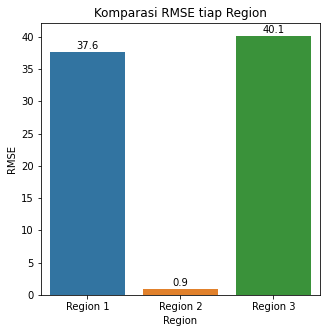

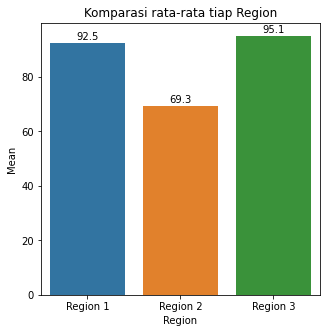

In [ ]:
grafik_komparasi(rmse_valid_1, rmse_valid_2, rmse_valid_3, 'RMSE', "Komparasi RMSE tiap Region")
grafik_komparasi(avg_valid_mean_1, avg_valid_mean_2, avg_valid_mean_3, 'Mean', 'Komparasi rata-rata tiap Region')

Terlihat bahwa pada grafik diatas, bahwa rata-rata yang didapatkan pada Region 1 dan Region 3 tidak sepadan untuk menggantikan Region 2 yang memiliki RMSE yang sangat kecil.

### Sanity Check

Sanity Check yang akan dilakukan, dikomparasi terhadap region 2. Hal ini dilakukan karena Region 2 untuk sementara akan dijadikan titik yang akan dipilih.

In [ ]:
model_dummy = DummyRegressor()
features_dummy = train_reg2.drop(['id','product'], axis=1)
target_dummy = train_reg2['product']
model_dummy.fit(features_dummy, target_dummy)
print(f'RMSE model dummy      : {mean_squared_error(target_dummy, model_dummy.predict(features_dummy))**0.5}')
print(f'Average predict dummy : {model_dummy.predict(features_dummy).mean()}')
print(f'Average real dummy    : {target_dummy.mean()}')

RMSE model dummy      : 45.98490821857127
Average predict dummy : 68.67542921307368
Average real dummy    : 68.67542921307367


Memang untuk rata rata yang dihasilkan dari model dummy sangat dekat dengan rata rata yang dihasilkan dari model regresi linier yang dibuat, namun untuk RMSE yang dihasilkan model dummy sangat jauh dibandingkan dengan model regresi linier yang dibuat. Hal ini berarti model yang dibuat untuk Region 2 bekerja dengan baik.

## Perhitungan Laba

Dalam perhitungan laba, terdapat kondisi kondisi yang harus diperhatikan yaitu, biaya untuk pembuatan 200 sumur adalah 100 Juta USD, dengan harga seribu barel yaitu 4500 USD.

Sebelum melangkah lebih jauh, sekecil kecilnya laba harus lebih besar dari biaya pembuatan 200 sumur yaitu 100 Juta USD.

In [ ]:
biaya200titik = 100e6
titik = 200
income = 4500
biaya_per_titik = biaya200titik/titik
print(f'Sehingga, minimal minyak cadangan yang harus ada pada 200 sumur dalam wilayah yang akan dipilih adalah {biaya200titik/income} ribu barel')

Sehingga, minimal minyak cadangan yang harus ada pada 200 sumur dalam wilayah yang akan dipilih adalah 22222.222222222223 ribu barel


In [ ]:
def keuntungan(predict, region_ke, income=4500, biaya_200_titik = 100e6, titik = 200):
    predict = pd.Series(predict)
    best_200 = predict.sort_values(ascending=False)[:200]
    product = best_200.sum()
    total_income = income * product
    profit = total_income - biaya_200_titik

    print(f'Data Geo Data {region_ke}')
    print('-----------------------------------------------')
    print(f'Jumlah Barel dalam ribuan      : {product}')
    print(f'Jumlah produk lebih dari batas : {product - biaya200titik/income}')
    print(f'Laba                           : {profit}')
    print(f'Total Cost                     : {biaya_200_titik}')
    print(f'Total Income                   : {total_income}')
    print('-----------------------------------------------')
    return total_income

In [ ]:
laba_bersih_1 = keuntungan(predict_1,"Region 1")
laba_bersih_2 = keuntungan(predict_2,"Region 2")
laba_bersih_3 = keuntungan(predict_3,"Region 3")

Data Geo Data Region 1
-----------------------------------------------
Jumlah Barel dalam ribuan      : 31034.787805093576
Jumlah produk lebih dari batas : 8812.565582871353
Laba                           : 39656545.12292108
Total Cost                     : 100000000.0
Total Income                   : 139656545.12292108
-----------------------------------------------
Data Geo Data Region 2
-----------------------------------------------
Jumlah Barel dalam ribuan      : 27755.76198279395
Jumlah produk lebih dari batas : 5533.539760571726
Laba                           : 24900928.922572777
Total Cost                     : 100000000.0
Total Income                   : 124900928.92257278
-----------------------------------------------
Data Geo Data Region 3
-----------------------------------------------
Jumlah Barel dalam ribuan      : 29943.443110391767
Jumlah produk lebih dari batas : 7721.220888169544
Laba                           : 34745493.99676296
Total Cost                     : 10

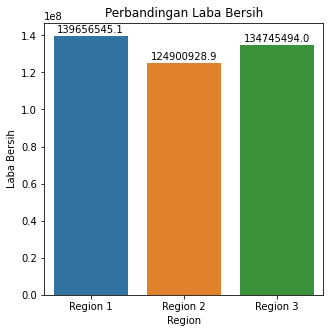

In [ ]:
grafik_komparasi(laba_bersih_1, laba_bersih_2, laba_bersih_3, "Laba Bersih", "Perbandingan Laba Bersih")

Dari grafik yang ditampilkan diatas, terlihat bahwa Region 1 memiliki Laba Bersih terbanyak dan disusul oleh Region 3, dan yang terakhir adalah Region 2. Mungkin jika hanya mengandalkan grafik ini saja, Region 1 akan dipilih menjadi wilayah untuk projek penambangan minyak selanjutnya, namun ada hal penting yang harus diperhatikan yaitu nilai RMSE di Region 1 dan Region 3 sangat besar. Hal ini menandakan bahwa pemodelan yang dibuat "memang" bisa memprediksi namun memiliki error yang bisa dikatakan besar, berbeda dengan Region 2 yang memiliki RMSE yang kecil (bahkan dibawah 1), meskipun Laba bersih yang didapatkan lebih sedikit dibandingkan dengan kedua region lain, namun untuk perbandingan kali ini, Region 2 masuk dalam kategori tidak buruk dengan RMSE yang sangat kecil.

Namun sebelum benar benar memilih Region 2, ada hal lebih lanjut yang harus diperhatikan yaitu tentang distribusi laba, resiko kerugian, dan selang kepercayaan 95%.

## Resiko

Karena dalam bisnis ada yang namanya kegagalan, maka untuk menghindari kegagalan tersebut dilakukan analisa resiko yang akan dihadapi, salah satunya adalah resiko kerugian.

### Distribusi Laba dan Selang Kepercayaan

Untuk mengetahui distribusi laba, digunakan teknik bootstrapping 1000 kali dengan 500 sampel.

In [ ]:
state = np.random.RandomState(12345)
def boostrap_laba(data, region_ke):
    values = []
    for i in range(1000):
        data = pd.Series(data)
        target_subsample = data.sample(n=500, replace=True, random_state=state)    
        values.append(target_subsample.mean())
    values = pd.Series(values)
    print(f'Rata-rata mean {region_ke} setelah dilakukan bootstrap sebanyak 1000 kali dengan 500 sample adalah : {values.mean()}')
    print(f'Selang kepercayaan 95% didapat untuk batas bawah adalah {values.quantile(0.05)}')
    print(f'dan batas atas adalah {values.quantile(0.95)} dengan perbedaan {values.quantile(0.95)-values.quantile(0.05)}')
    print('-----------------------------------------------------------------------------------')
    plt.figure(figsize=(8,5))
    sb.histplot(values)
    plt.axvline(x=values.mean(), color='red',ls='-')
    plt.axvline(x=values.median(), color='green', ls='--')
    plt.xlabel("Mean")
    plt.ylabel("Jumlah")
    plt.title(f'Distribusi Data {region_ke}')

Rata-rata mean Region 1 setelah dilakukan bootstrap sebanyak 1000 kali dengan 500 sample adalah : 92.61067830653309
Selang kepercayaan 95% didapat untuk batas bawah adalah 90.8526966840954
dan batas atas adalah 94.33335117195624 dengan perbedaan 3.480654487860832
-----------------------------------------------------------------------------------
Rata-rata mean Region 2 setelah dilakukan bootstrap sebanyak 1000 kali dengan 500 sample adalah : 69.32874015191274
Selang kepercayaan 95% didapat untuk batas bawah adalah 65.99873176714861
dan batas atas adalah 72.74139167384074 dengan perbedaan 6.742659906692126
-----------------------------------------------------------------------------------
Rata-rata mean Region 3 setelah dilakukan bootstrap sebanyak 1000 kali dengan 500 sample adalah : 95.11355118106225
Selang kepercayaan 95% didapat untuk batas bawah adalah 93.58651355743618
dan batas atas adalah 96.58455812844389 dengan perbedaan 2.9980445710077106
-------------------------------------

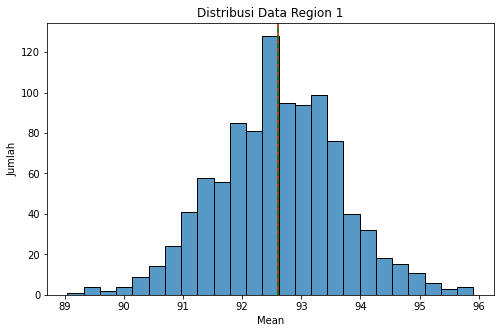

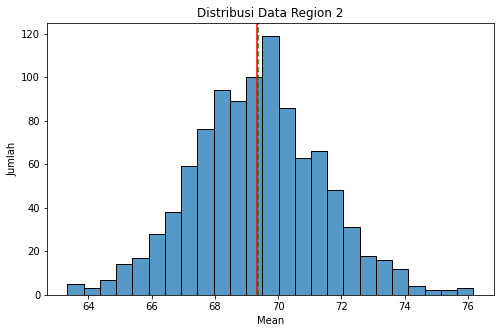

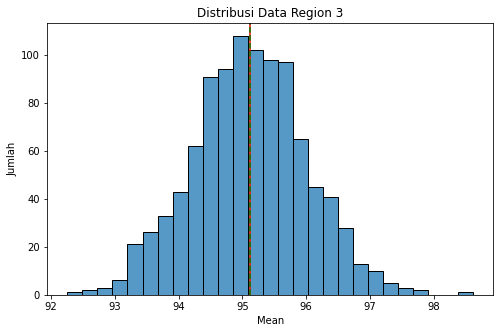

In [ ]:
boostrap_laba(predict_1, "Region 1")
boostrap_laba(predict_2, "Region 2")
boostrap_laba(predict_3, "Region 3")

Jika dilihat dari bootstrap yang sudah dilakukan, data data tersebut bisa dianggap memiliki distribusi normal, ditandai dengan posisi mean dan median yang berdekatan.

### Resiko Kerugian

Karena yang akan dijadikan studi adalah 500 titik, maka 500 titik terbaik akan dijadikan acuan dalam penentuan resiko kerugian.

In [ ]:
def kerugian(asli,prediksi,region_ke):
    data_laba = pd.DataFrame({'real': asli})
    data_laba['prediction'] = prediksi
    data_laba['predict_income'] = data_laba['prediction'] * 4500
    data_laba['real_income'] = data_laba['real'] * 4500
    data_laba['cost/point'] = 100e6/200
    data_laba['profit'] = data_laba['predict_income'] - data_laba['cost/point']
    data_laba = data_laba.sort_values(by='profit', ascending=False)[:500]
    print(f'Jumlah kerugian sumur pada {region_ke} jika hanya 500 titik terbaik yang di riset adalah {(data_laba.profit<0).sum()}')

In [ ]:
kerugian(real_1,predict_1,"Region 1")
kerugian(real_2,predict_2,"Region 2")
kerugian(real_3,predict_3,"Region 3")



Jumlah kerugian sumur pada Region 1 jika hanya 500 titik terbaik yang di riset adalah 0
Jumlah kerugian sumur pada Region 2 jika hanya 500 titik terbaik yang di riset adalah 0
Jumlah kerugian sumur pada Region 3 jika hanya 500 titik terbaik yang di riset adalah 0


Terlihat di semua wilayah bahwa 500 titik terbaik memiliki profit yang plus. Namun yang perlu diperhatikan adalah berapa jumlah profitnya?

Hal ini sudah dilakukan sebelumnya di Bagian 3 Perhitungan Laba, dan yang paling menguntungkan jika mendapat titik terbaik adalah Region 1, dilanjut Region 3, dan terakhir Region 2. Namun, Region 2 memiliki RMSE yang paling kecil yaitu dibawah 1, sehingga penambangan di wilayah ini tidak terlalu "gamble".

## Kesimpulan

Kesimpulan yang didapatkan adalah 
1. Region 1 memiliki potensi yang paling besar dibandingkan region lainnya.
2. Region 2 memiliki RMSE yang paling kecil, dan jika dibanding dengan yang lainnya, perbedaannya sangat jauh.
3. Jika dilakukan studi di 500 titik terbaik, maka semua Region memiliki jumlah sumur berpotensi rugi yang sama, yaitu 0.
4. Dengan mempertimbangkan resiko rugi, dan RMSE yang didapat, maka Region 2 akan menjadi pilihan yang lebih berharga, meskipun Region lain memiliki keuntungan yang lebih besar dibanding Region 2, namun tetap saja region tersebut akan menjadi wilayah yang sedikit "gamble".